Встановлення необхідних бібліотек (тільки один раз)


In [27]:
install.packages("factoextra")  # Для візуалізації кластерів
install.packages("lubridate")   # Для роботи з датами
install.packages("ggplot2")     # Для побудови графіків
install.packages("dplyr")       # Для роботи з таблицями

Warning message:
"package 'factoextra' is in use and will not be installed"
Warning message:
"package 'lubridate' is in use and will not be installed"


Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"


Завантаження бібліотек


In [28]:
library(dplyr)
library(factoextra)
library(lubridate)
library(ggplot2)

Завантаження і підготвока даних до кластеризації


In [29]:
# Завантаження даних
df <- read.csv("expenses1.csv")

# Перетворення дати у формат Date
df$Transaction.Date <- as.Date(df$Transaction.Date, format="%Y-%m-%d")

# Отримання першого числа місяця
df$First.Day.Of.Month <- floor_date(df$Transaction.Date, unit = "month")

# Обчислення кількості днів від початку місяця
df$Days.Since.First <- as.numeric(df$Transaction.Date - df$First.Day.Of.Month)

# Видалення зайвих колонок
df_cleaned <- df %>% select(Income.Spendings, Days.Since.First)

Масштабування даних (Z-score normalization)


In [30]:
# Масштабування даних (Z-score normalization)
df_scaled <- scale(df_cleaned)

Визначення оптимальної кількості кластерів методом "Elbow"


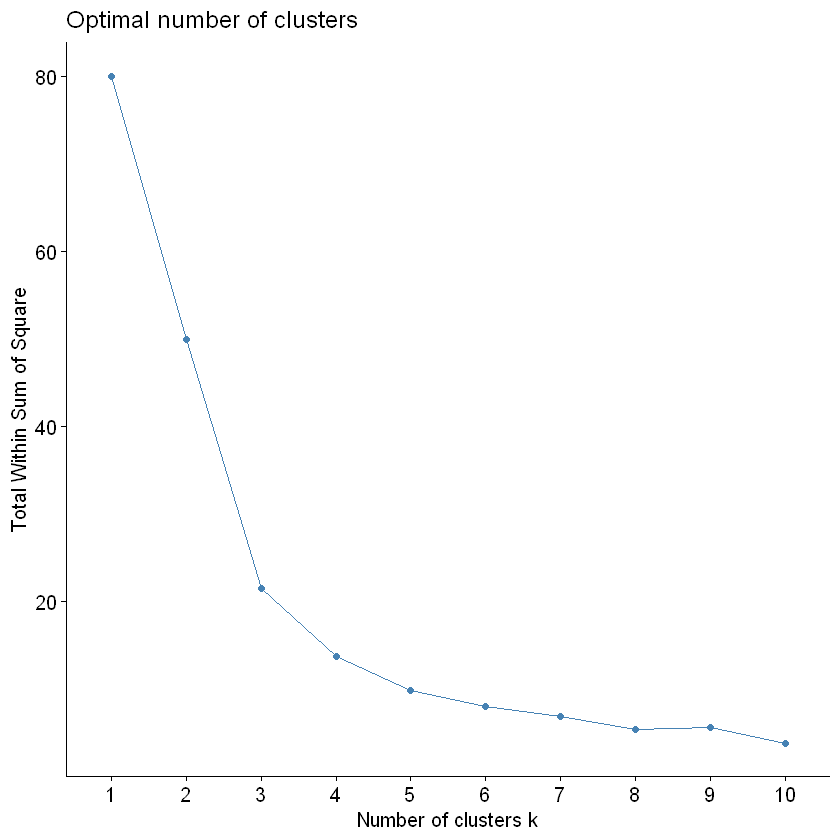

In [31]:
# Визначення оптимальної кількості кластерів методом "Elbow"
fviz_nbclust(df_scaled, kmeans, method = "wss")

Побудова K-Means моделі з 3 кластерами (можна змінити кількість)


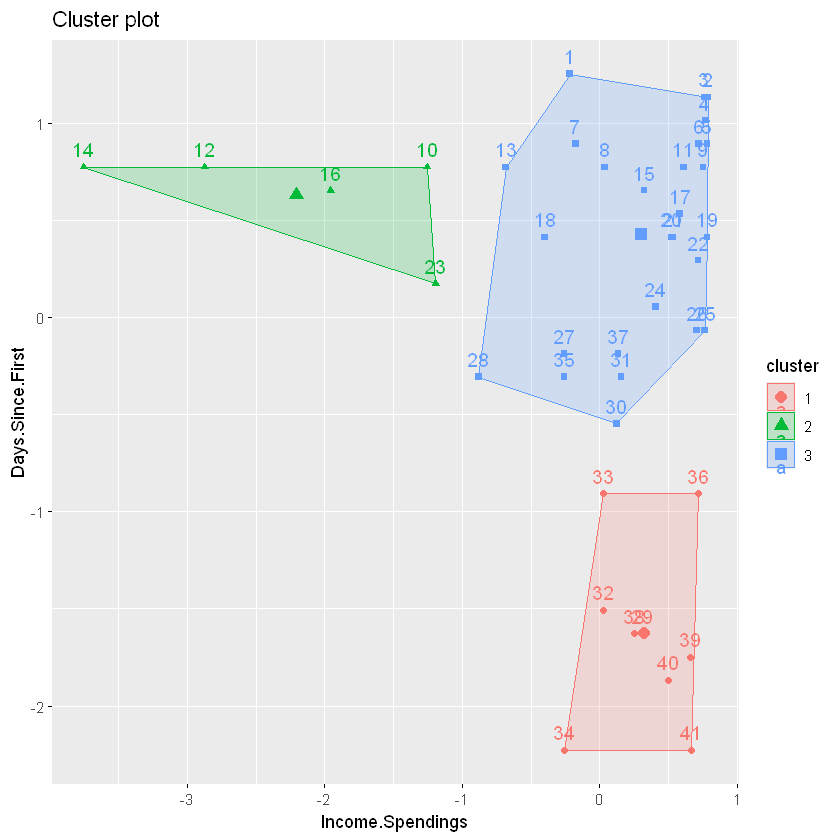

In [32]:
# Побудова K-Means моделі з 3 кластерами (можна змінити кількість)
set.seed(42)
kmeans_model <- kmeans(df_scaled, centers = 3, nstart = 25)

# Візуалізація кластерів
fviz_cluster(kmeans_model, data = df_scaled)

Ієрархічна кластеризація + дендограма


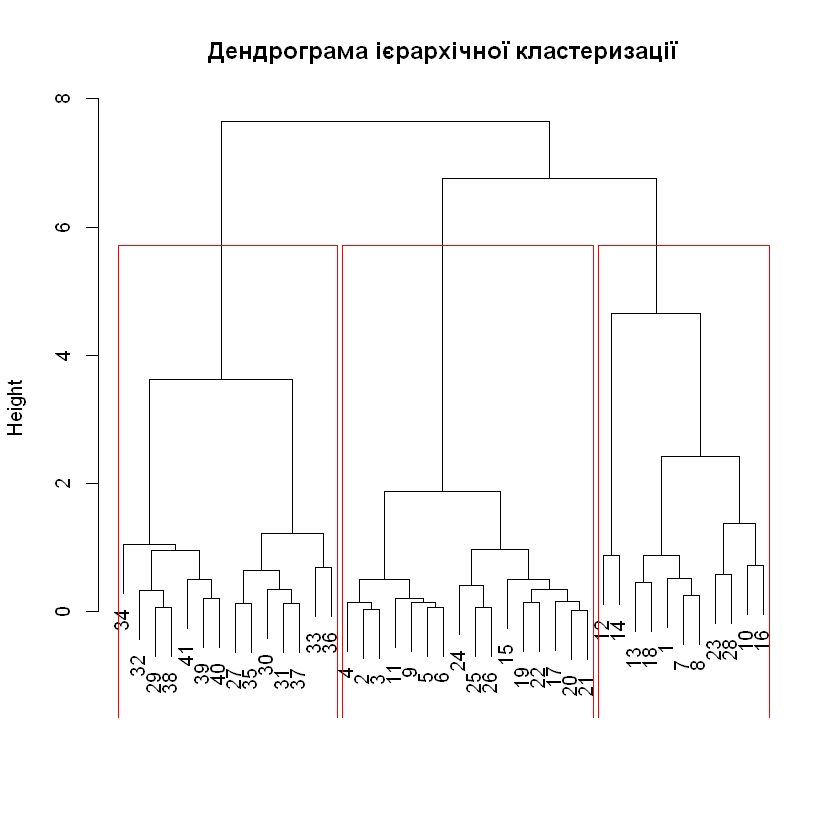

In [33]:
# Ієрархічна кластеризація
dist_matrix <- dist(df_scaled, method = "euclidean")  # Обчислення відстаней
hclust_model <- hclust(dist_matrix, method = "ward.D2")

# Побудова дендрограми
plot(hclust_model, main = "Дендрограма ієрархічної кластеризації", sub = "", xlab = "")
rect.hclust(hclust_model, k = 3, border = "red")  # Відображення 3 кластерів

Кластери


In [34]:
# Додавання кластерів до основного датасету
df$Cluster <- kmeans_model$cluster

# Відкриття кожного кластеру в окремому вікні для перегляду
View(df_cluster_1)
View(df_cluster_2)
View(df_cluster_3)


Transaction.Name,Income.Spendings,Transaction.Date,Category,Transaction.Description,First.Day.Of.Month,Days.Since.First,Cluster
<chr>,<dbl>,<date>,<lgl>,<chr>,<date>,<dbl>,<int>
Kovzanka,-200.00,2025-01-07,NA,,2025-01-01,6,1
From YujnoUk to Myko,-300.00,2025-01-08,NA,,2025-01-01,7,1
Flowers fo Nastya,-300.00,2025-01-13,NA,,2025-01-01,12,1
Flowers for Nastya's mum,-400.00,2025-01-02,NA,,2025-01-01,1,1
Simeyna pekarnya,-56.00,2025-01-13,NA,,2025-01-01,12,1
Food?,-222.00,2025-01-07,NA,,2025-01-01,6,1
ATB,-76.80,2025-01-06,NA,,2025-01-01,5,1
Food???,-134.76,2025-01-05,NA,,2025-01-01,4,1
Mida products,-75.10,2025-01-02,NA,,2025-01-01,1,1


Transaction.Name,Income.Spendings,Transaction.Date,Category,Transaction.Description,First.Day.Of.Month,Days.Since.First,Cluster
<chr>,<dbl>,<date>,<lgl>,<chr>,<date>,<dbl>,<int>
Педалька (подарунок),-752,2025-01-27,NA,,2025-01-01,26,2
Умивалка + гель,-1323,2025-01-27,NA,,2025-01-01,26,2
Retinoid,-1633,2025-01-27,NA,,2025-01-01,26,2
10% church + sacrifice,-1000,2025-01-26,NA,,2025-01-01,25,2
Korean food + alcohol,-730,2025-01-22,NA,,2025-01-01,21,2


Transaction.Name,Income.Spendings,Transaction.Date,Category,Transaction.Description,First.Day.Of.Month,Days.Since.First,Cluster
<chr>,<dbl>,<date>,<lgl>,<chr>,<date>,<dbl>,<int>
McDonald’s,-386.0,2025-01-31,NA,,2025-01-01,30,3
Novus,-32.0,2025-01-30,NA,,2025-01-01,29,3
Сім.пек,-41.0,2025-01-30,NA,,2025-01-01,29,3
Simeyna pekarnya,-39.0,2025-01-29,NA,,2025-01-01,28,3
STRUDELEC,-33.0,2025-01-28,NA,,2025-01-01,27,3
AVRORA,-55.0,2025-01-28,NA,,2025-01-01,27,3
NOVUS,-371.0,2025-01-28,NA,,2025-01-01,27,3
Крем для обличчя,-296.0,2025-01-27,NA,,2025-01-01,26,3
Simeyna pekarnya,-44.0,2025-01-27,NA,,2025-01-01,26,3


: 